In [1]:
import os
import numpy as np
import nibabel as nib
from nilearn import plotting

/usr/local/lib/python3.5/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Importing the required libraries Nibabel and Nilearn specifically for NIFTI Images.

Put in the directory path to the original 3D Maps image folders

In [2]:

path = "/home/avnish_edin/fmri-raw-database/Images/"

KeyboardInterrupt: 

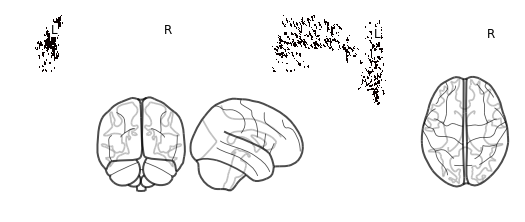

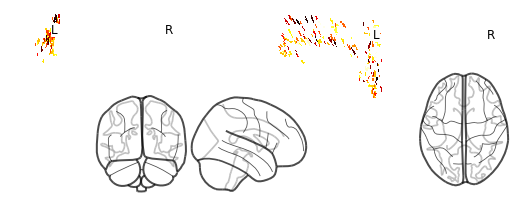

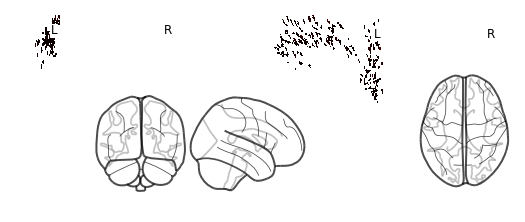

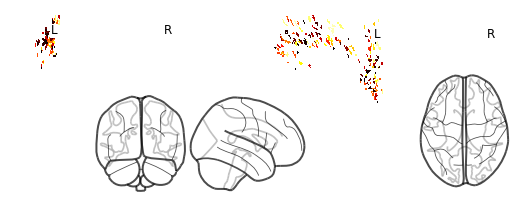

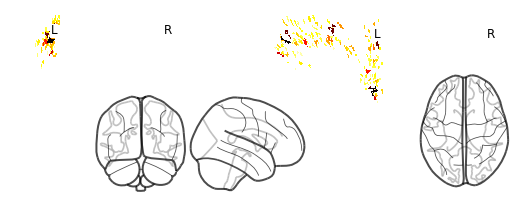

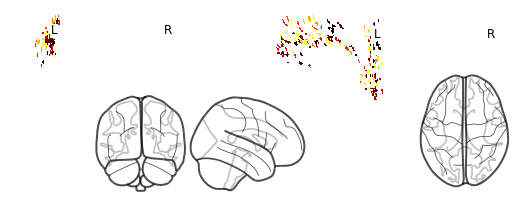

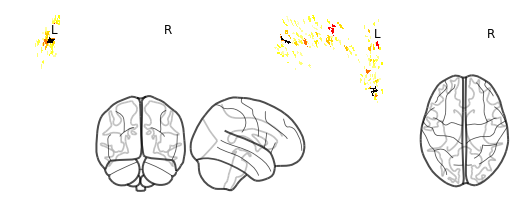

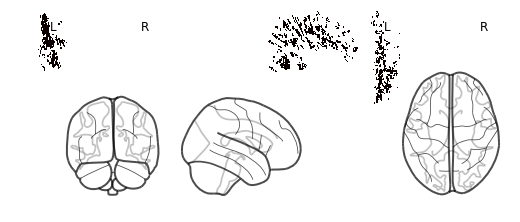

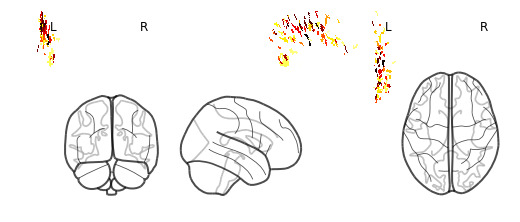

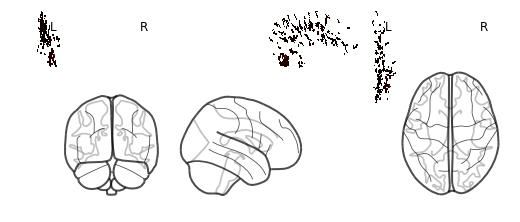

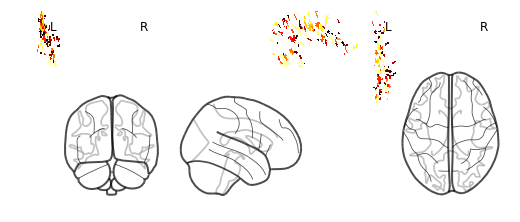

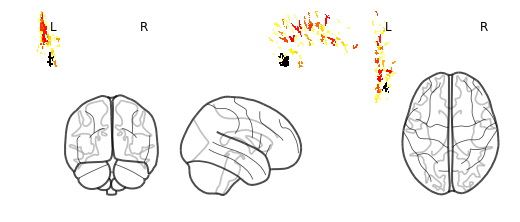

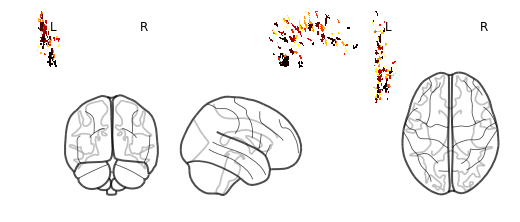

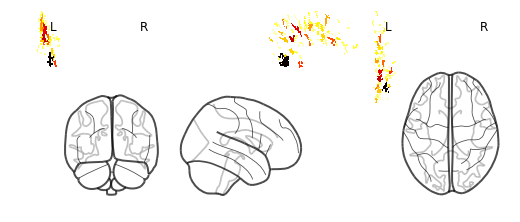

In [3]:
i = 0
for root,d_names,f_names in os.walk(path):
    d_names.sort()
    if i==0:
        cases = d_names
    if i != 0:
        f_names.sort()
        case_path = os.path.join(path,cases[i-1])
        stack_img = np.empty([256,156,256])
        for files in f_names:
            #print(files)
            img = nib.load(os.path.join(case_path,files))
            #plotting.plot_glass_brain(os.path.join(case_path,files))   
            img_data = img.get_data()
            img_data_arr = np.asarray(img_data)
            stack_img = np.append(stack_img, img_data_arr, axis=2)
            #print(stack_img.shape)
        imgs = nib.Nifti1Image(stack_img, img.affine)
        nib.save(imgs, os.path.join("/home", cases[i-1]+".nii.gz"))

    i= i+1

The raw fmri data is converetd to a single nifti file by stackinhg the 3d volumes of each of the 14 fmri images of a patient. The corresponding resulting file is written as the case number with the nifti extension. 